# l'impact de la longueur du titre sur les réactions (likes , shares , comments)

In [5]:
import pandas as pd

In [8]:
import  matplotlib.pyplot as mpl

In [9]:
df = pd.read_csv("articles_data.csv", index_col='index')

In [10]:
#Ajouter une colonne pour la taille des titre 

df['title_length']= df['title'].str.len() 

In [11]:
#calculer le total des commentaires shares et likes

df['reactions_count'] = df['engagement_reaction_count'] + df['engagement_comment_count'] + df['engagement_share_count'] 

In [12]:
#Regrouper le nombre des reactions par rapport à la tailles des titres et afficher les 6 titres les plus longs et la somme des réactions qui'ils ont eu
df[['title_length','reactions_count']].groupby('title_length').sum('reactions_count').sort_values(['title_length'], ascending=[False]).head(6)

,reactions_count
title_length,
250.0,1753.0
230.0,1.0
220.0,100.0
194.0,23.0
192.0,68.0
189.0,571.0


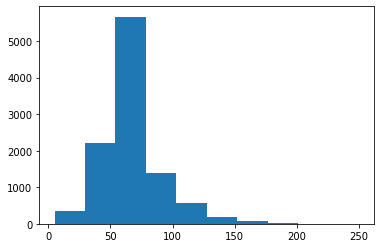

In [56]:
mpl.hist(df.title_length)
mpl.show()


# l'impact de la longueur de l'article sur les réactions

In [59]:
#Ajouter une colonne pour la taille de l'article 
df['article_length']= df['content'].str.len() 

In [61]:
#Regrouper le nombre des reactions par rapport à la tailles des contenu
df[['article_length','reactions_count']].groupby('article_length').sum('reactions_count').sort_values(['article_length'], ascending=[False]).head(6)

,reactions_count
article_length,
276.0,0.0
275.0,36023.0
274.0,3514433.0
273.0,1882312.0
272.0,461553.0
271.0,104283.0


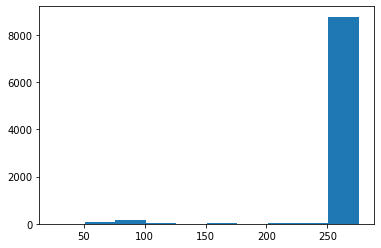

In [62]:
mpl.hist(df.article_length)
mpl.show()